**"Sweet Insights: A Statistical Exploration of data of device with PPG sensors Using Python"**

Datatset Attributes:
o	heartRate: Heart rate readings from the smartwatch sensors 
o	ppgGreen: PPG (*) sensor readings in green wavelength
o	ppgRed: PPG sensor readings in red wavelength
o	ppgIR: PPG sensor readings in infrared wavelength
o	drowsiness: Level of drowsiness based on KSS (**)
o	period: Morning, Afternoon, Evening, Night


Data Source: https://www.kaggle.com/datasets/vitoraugustx/drowsiness-dataset



In [78]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
#Load the data
data = pd.read_csv('drowsiness_dataset.csv')
data.head()

,heartRate,ppgGreen,ppgRed,ppgIR,drowsiness
0,54.0,1584091.0,5970731.0,6388383.0,0.0
1,54.0,1584091.0,5971202.0,6392174.0,0.0
2,54.0,1581111.0,5971295.0,6391469.0,0.0
3,54.0,1579343.0,5972599.0,6396137.0,0.0
4,54.0,1579321.0,5971906.0,6392898.0,0.0


In [80]:
#Data Information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4890260 entries, 0 to 4890259
Data columns (total 5 columns):
 #   Column      Dtype  
---  ------      -----  
 0   heartRate   float64
 1   ppgGreen    float64
 2   ppgRed      float64
 3   ppgIR       float64
 4   drowsiness  float64
dtypes: float64(5)
memory usage: 186.5 MB


In [81]:
# Set a seaborn theme for the entire script
sns.set_theme(style='whitegrid', palette='deep')
sns.color_palette("Reds")

[(0.9950634371395617, 0.8596539792387543, 0.7986620530565167),
 (0.9882352941176471, 0.6866743560169165, 0.5778854286812765),
 (0.9865897731641676, 0.5067281814686659, 0.38123798539023457),
 (0.9570011534025374, 0.3087120338331411, 0.22191464821222606),
 (0.8370472895040368, 0.13394848135332565, 0.13079584775086506),
 (0.6663437139561708, 0.06339100346020761, 0.08641291810841982)]

In [82]:
#Statistical Summary
data.describe()

,heartRate,ppgGreen,ppgRed,ppgIR,drowsiness
count,4.890260e+06,4.890260e+06,4.890260e+06,4.890260e+06,4.890260e+06
mean,7.814245e+01,2.073589e+06,5.643653e+06,5.728191e+06,8.593592e-01
std,1.296635e+01,4.418773e+05,3.909626e+05,4.313052e+05,8.370285e-01
min,5.000000e+01,5.897580e+05,4.441989e+06,4.409976e+06,0.000000e+00
25%,6.800000e+01,1.780621e+06,5.368700e+06,5.402542e+06,0.000000e+00
50%,7.800000e+01,2.044658e+06,5.646039e+06,5.818748e+06,1.000000e+00
75%,8.700000e+01,2.333117e+06,5.927128e+06,6.016016e+06,2.000000e+00
max,1.190000e+02,3.530798e+06,6.842637e+06,7.061799e+06,2.000000e+00


In [83]:
data.columns

Index(['heartRate', 'ppgGreen', 'ppgRed', 'ppgIR', 'drowsiness'], dtype='object')

In [84]:
df = ['heartRate', 'ppgGreen', 'ppgRed', 'ppgIR', 'drowsiness']

                    Mean     Median       Mode      Variance  \
heartRate   7.814245e+01       78.0       77.0  1.681262e+02   
ppgGreen    2.073589e+06  2044657.5  1650079.0  1.952555e+11   
ppgRed      5.643653e+06  5646039.0  5330788.0  1.528518e+11   
ppgIR       5.728191e+06  5818748.0  5391672.0  1.860241e+11   
drowsiness  8.593592e-01        1.0        0.0  7.006168e-01   

            Standard Deviation  Skewness  Kurtosis  
heartRate            12.966349  0.317260 -0.310204  
ppgGreen         441877.278776  0.182614  0.681210  
ppgRed           390962.637695 -0.117119 -0.017428  
ppgIR            431305.164851 -0.310857 -0.530081  
drowsiness            0.837029  0.268993 -1.521791  


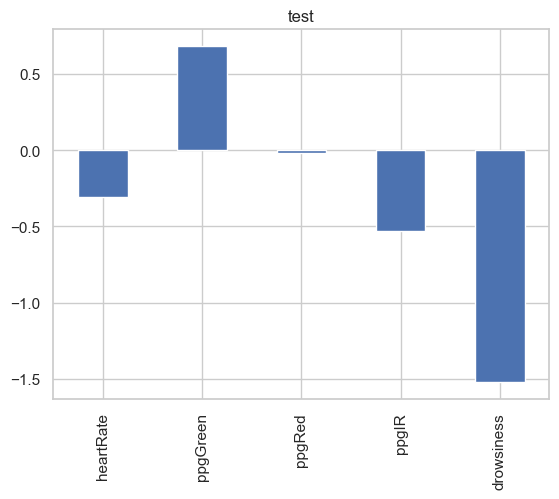

In [85]:
#Descriptive Tests

ds = pd.DataFrame({
    'Mean': data[df].mean(),
    'Median': data[df].median(),
    'Mode': data[df].mode().iloc[0],
    'Variance': data[df].var(),
    'Standard Deviation': data[df].std(),
    'Skewness': data[df].skew(),
    'Kurtosis': data[df].kurt()
})

ds['Kurtosis'].plot(x=data['heartRate'], y='Median', kind='bar', title='test')
print(ds)

In [86]:
ds.head()

,Mean,Median,Mode,Variance,Standard Deviation,Skewness,Kurtosis
heartRate,7.814245e+01,78.0,77.0,1.681262e+02,12.966349,0.317260,-0.310204
ppgGreen,2.073589e+06,2044657.5,1650079.0,1.952555e+11,441877.278776,0.182614,0.681210
ppgRed,5.643653e+06,5646039.0,5330788.0,1.528518e+11,390962.637695,-0.117119,-0.017428
ppgIR,5.728191e+06,5818748.0,5391672.0,1.860241e+11,431305.164851,-0.310857,-0.530081
drowsiness,8.593592e-01,1.0,0.0,7.006168e-01,0.837029,0.268993,-1.521791


In [88]:
# Define the number of periods
num_periods = 4

# Calculate the size of each period
period_size = len(data)

# Create a period column
period_labels = ['Morning','Afternoon','Evening','Night']
data['period'] = pd.cut(data.index, bins=num_periods, labels=period_labels)

# Check the distribution of periods
print(data['period'].value_counts())
#print(data['period'])

# Segment the data by period
morning_data = data[data['period'] == 'Morning']
afternoon_data = data[data['period'] == 'Afternoon']
evening_data = data[data['period'] == 'Evening']
night_data = data[data['period'] == 'Night']


period
Morning      1222565
Afternoon    1222565
Evening      1222565
Night        1222565
Name: count, dtype: int64


          heartRate      ppgGreen        ppgRed         ppgIR    drowsiness
count  4.890260e+06  4.890260e+06  4.890260e+06  4.890260e+06  4.890260e+06
mean   7.814245e+01  2.073589e+06  5.643653e+06  5.728191e+06  8.593592e-01
std    1.296635e+01  4.418773e+05  3.909626e+05  4.313052e+05  8.370285e-01
min    5.000000e+01  5.897580e+05  4.441989e+06  4.409976e+06  0.000000e+00
25%    6.800000e+01  1.780621e+06  5.368700e+06  5.402542e+06  0.000000e+00
50%    7.800000e+01  2.044658e+06  5.646039e+06  5.818748e+06  1.000000e+00
75%    8.700000e+01  2.333117e+06  5.927128e+06  6.016016e+06  2.000000e+00
max    1.190000e+02  3.530798e+06  6.842637e+06  7.061799e+06  2.000000e+00
Correlation Matrix:
             heartRate  ppgGreen    ppgRed     ppgIR  drowsiness
heartRate    1.000000  0.008516  0.319754  0.344291   -0.675909
ppgGreen     0.008516  1.000000  0.453679  0.263743    0.108788
ppgRed       0.319754  0.453679  1.000000  0.768679   -0.389148
ppgIR        0.344291  0.263743  0.7686

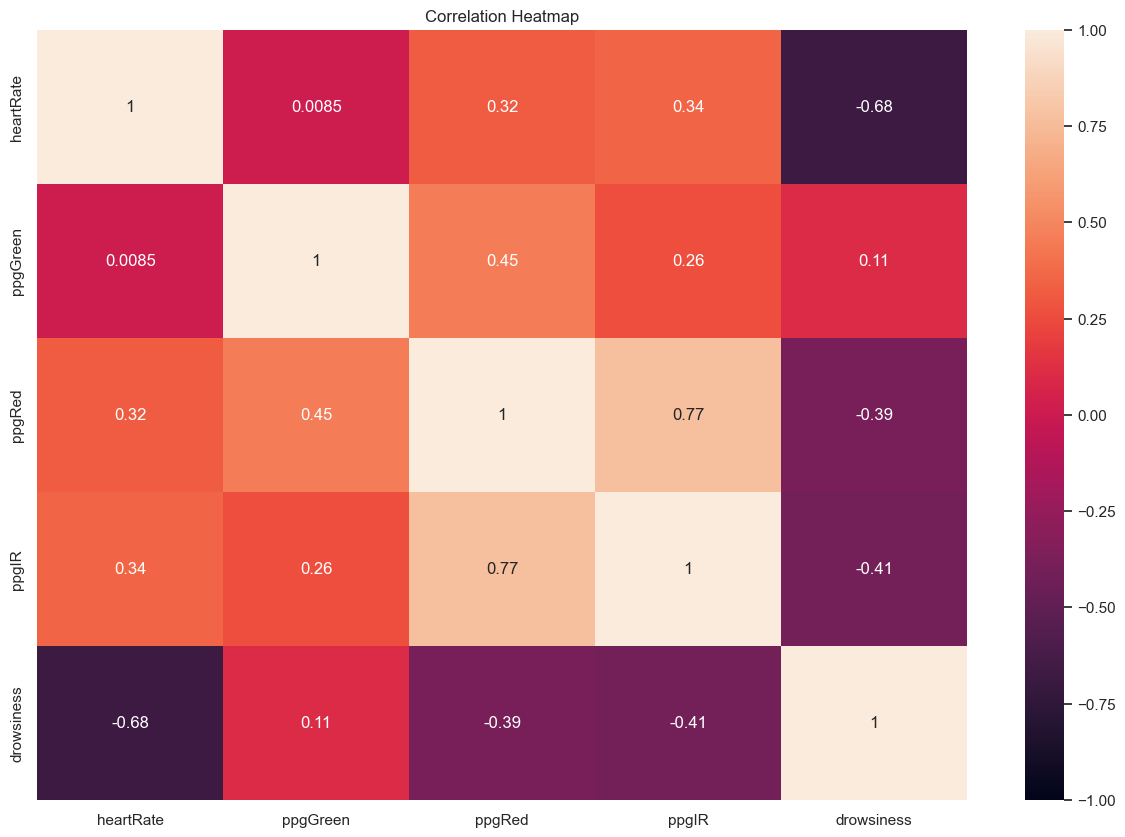

In [89]:
df = ['heartRate', 'ppgGreen', 'ppgRed', 'ppgIR', 'drowsiness']

# Check for constant columns and remove them
valid_numeric_columns = [col for col in df if data[col].nunique() > 1]

# Generate detailed descriptive statistics for numeric columns
descriptive_stats = data[valid_numeric_columns].describe()
print(descriptive_stats)

# Compute correlation only for valid numeric columns
correlation_matrix = data[valid_numeric_columns].corr()

# Debugging step: print correlation matrix
print("Correlation Matrix:\n", correlation_matrix)

# Generate heatmap if correlation matrix is not empty
if not correlation_matrix.isnull().all().all():
    plt.figure(figsize=(15, 10))
    sns.heatmap(correlation_matrix, annot=True,  vmin=-1, vmax=1)
    plt.title('Correlation Heatmap')
    plt.show()
else:
    print("No valid correlations to display. All columns may contain constant values or NaNs.")

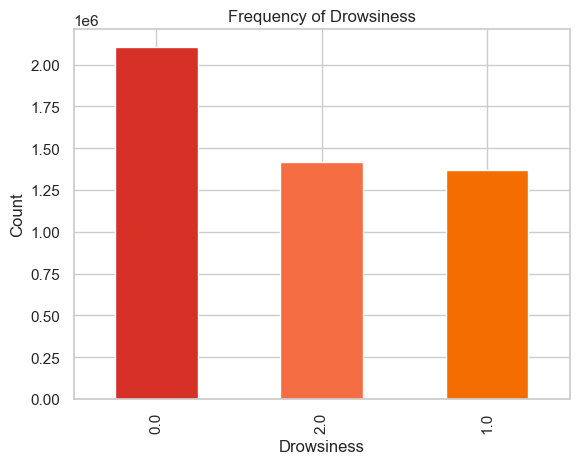

In [90]:
# Frequency distribution of Drowsiness
quality_counts = data['drowsiness'].value_counts()  #.data['drowsiness'].value_counts()
quality_counts.plot(kind='bar', title='Frequency of Drowsiness', color=['#d73027', '#f46d43', '#f46d00'])
#quality_counts.plot(kind='pie', title='Frequency of Drowsiness')
plt.xlabel('Drowsiness')
plt.ylabel('Count')
plt.show()

C:\Users\blccr\AppData\Local\Temp\ipykernel_22112\3614954681.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='drowsiness', y='heartRate', data=data, palette='Reds')


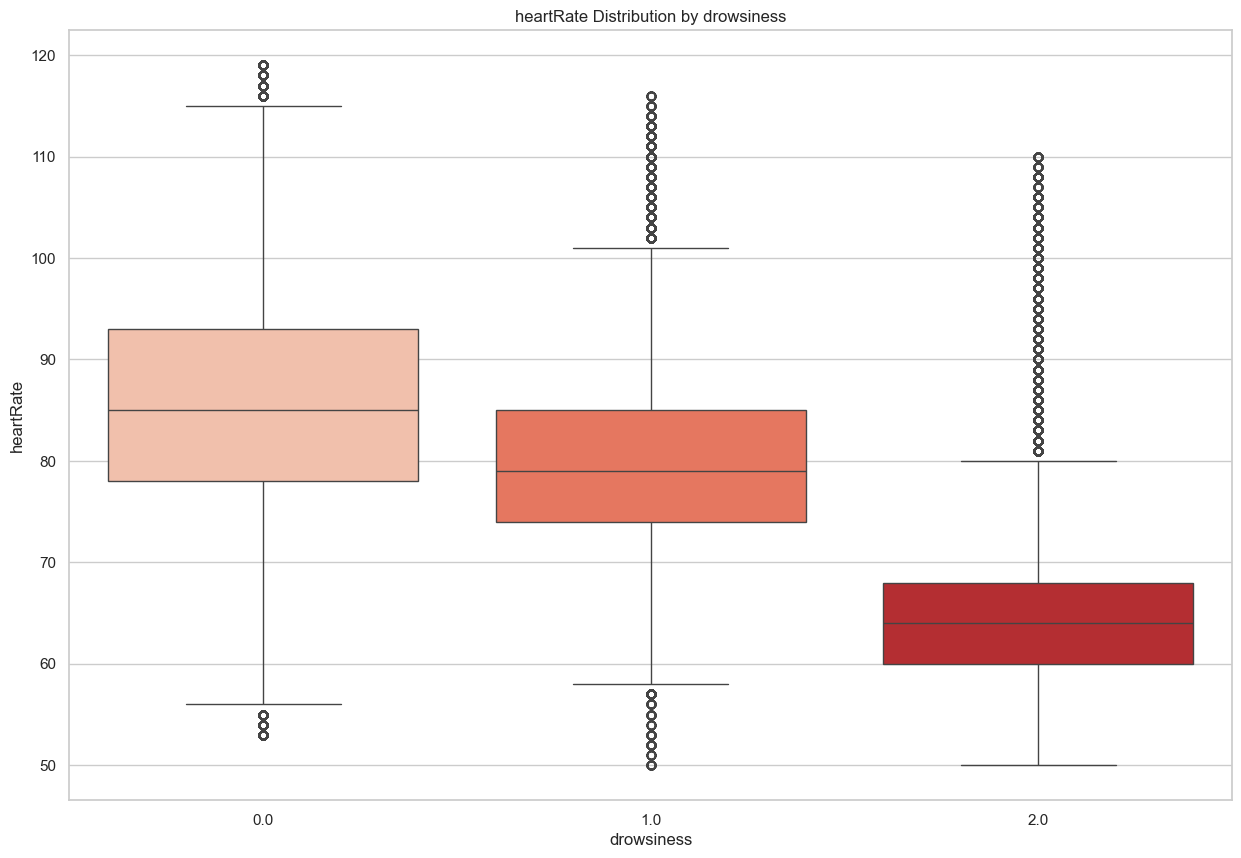

In [267]:
# Visualization
plt.figure(figsize=(15, 10))
sns.boxplot(x='drowsiness', y='heartRate', data=data, palette='Reds')
plt.title('heartRate Distribution by drowsiness')
plt.show()

C:\Users\blccr\AppData\Local\Temp\ipykernel_28960\655138030.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x='ppgRed', y='ppgIR', data=morning_data, palette='Reds')


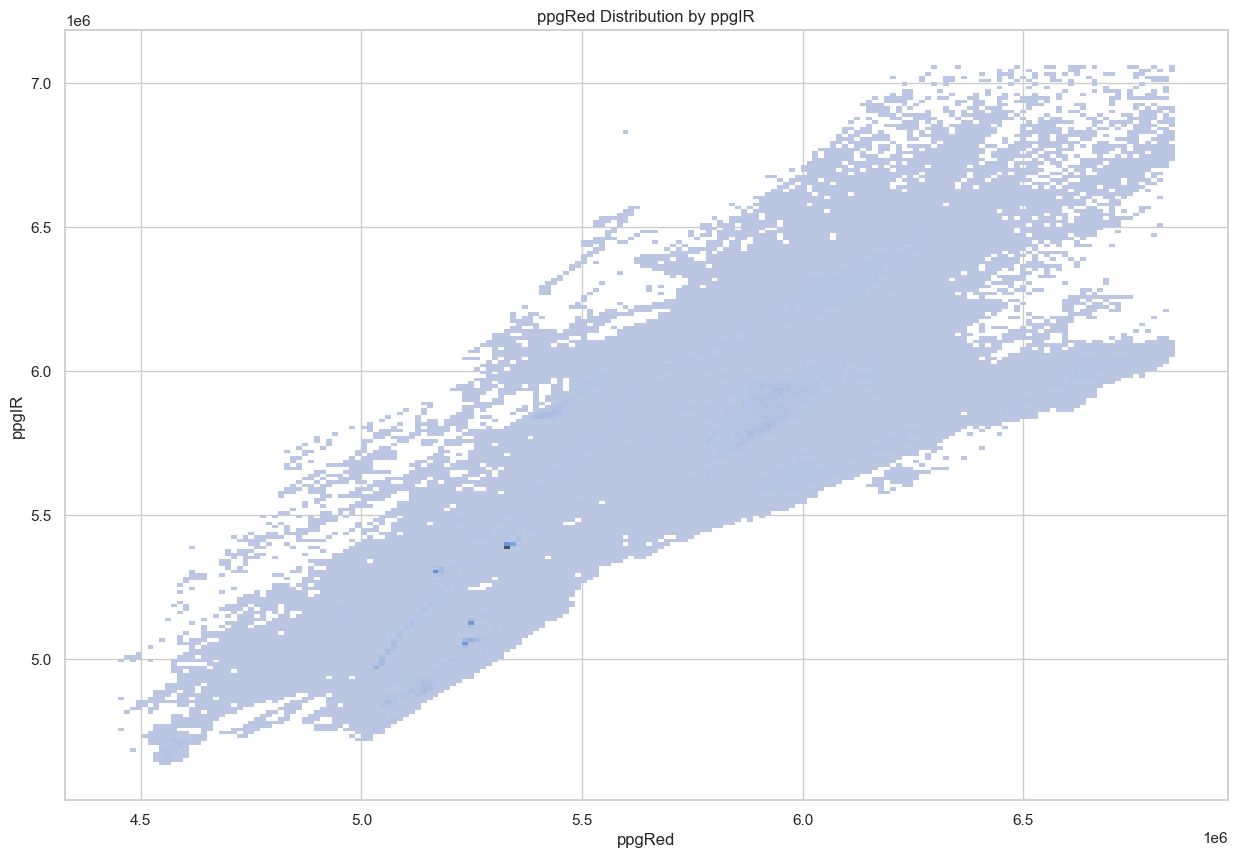

In [15]:
# Visualization type 2
#df = ['heartRate', 'ppgGreen', 'ppgRed', 'ppgIR', 'drowsiness']
plt.figure(figsize=(15, 10))
sns.histplot(x='ppgRed', y='ppgIR', data=morning_data, palette='Reds')
plt.title('ppgRed Distribution by ppgIR')
plt.show()

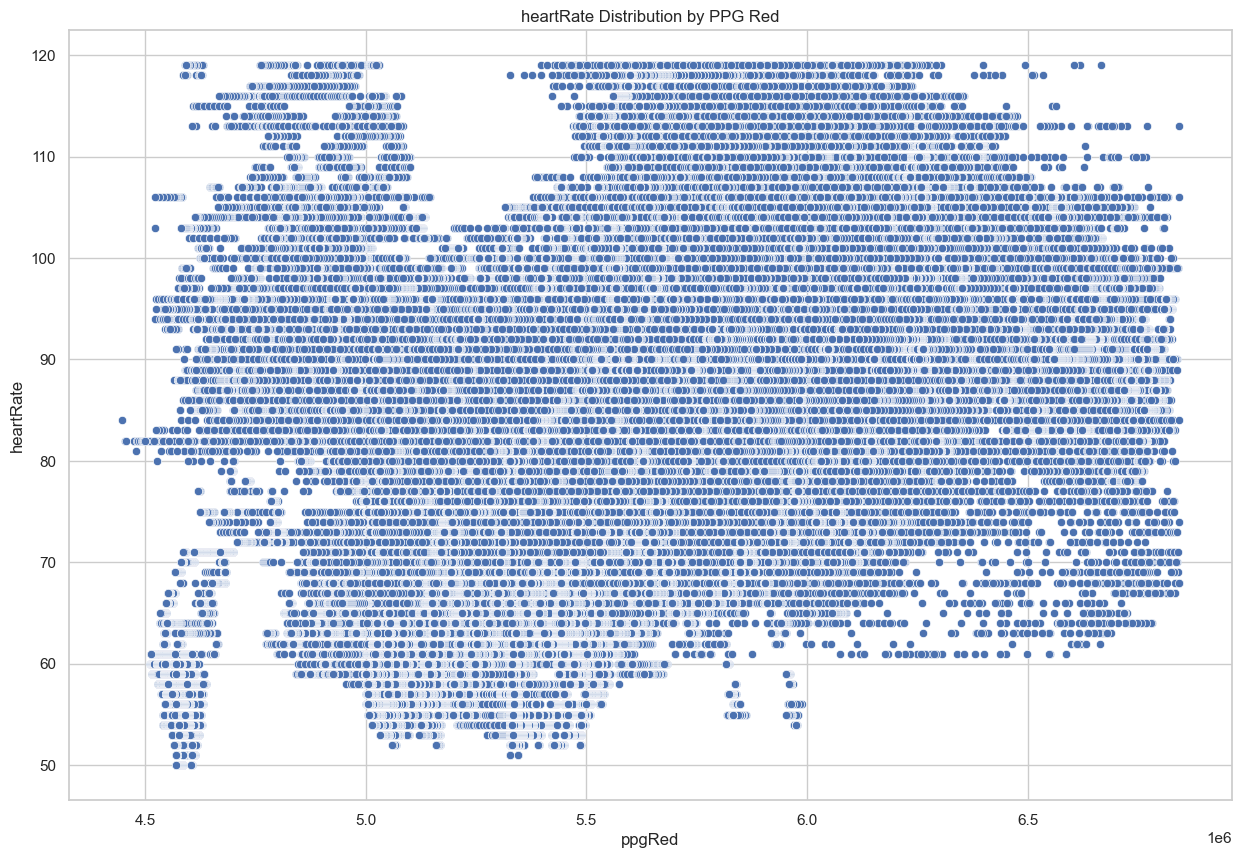

In [92]:
# Visualization type 3
plt.figure(figsize=(15, 10))
sns.scatterplot(x='ppgRed', y='heartRate', data=morning_data)
plt.title('heartRate Distribution by PPG Red')
plt.show()

In [93]:
import matplotlib.pyplot

def calculate_and_plot_correlations(data, period_name):
    correlation_heart_rate = data['drowsiness'].corr(data['heartRate'])
    correlation_ppg_green = data['drowsiness'].corr(data['ppgGreen'])
    correlation_ppg_red = data['drowsiness'].corr(data['ppgRed'])
    correlation_ppg_ir = data['drowsiness'].corr(data['ppgIR'])

    print(f'Correlation between drowsiness and heart rate ({period_name}): {correlation_heart_rate}')
    print(f'Correlation between drowsiness and PPG Green ({period_name}): {correlation_ppg_green}')
    print(f'Correlation between drowsiness and PPG Red ({period_name}): {correlation_ppg_red}')
    print(f'Correlation between drowsiness and PPG IR ({period_name}): {correlation_ppg_ir}')

    plt.scatter(data['heartRate'], data['drowsiness'], alpha=0.5, label='Heart Rate',color='blue')
    plt.scatter(data['ppgGreen'], data['drowsiness'], alpha=0.5, label='PPG Green', color='green')
    plt.scatter(data['ppgRed'], data['drowsiness'], alpha=0.5, label='PPG Red', color='red')
    plt.scatter(data['ppgIR'], data['drowsiness'], alpha=0.5, label='PPG IR', color='purple')
    plt.title(f'Drowsiness Levels vs. Heart Rate and PPG Readings ({period_name})')
    plt.xlabel('Activity Level')
    plt.ylabel('Drowsiness Level')
    plt.legend()
    plt.show()


Correlation between drowsiness and heart rate (Morning): -0.6319114762754804
Correlation between drowsiness and PPG Green (Morning): -0.08278873014767286
Correlation between drowsiness and PPG Red (Morning): -0.6565096863047454
Correlation between drowsiness and PPG IR (Morning): -0.5784903897390709


f:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


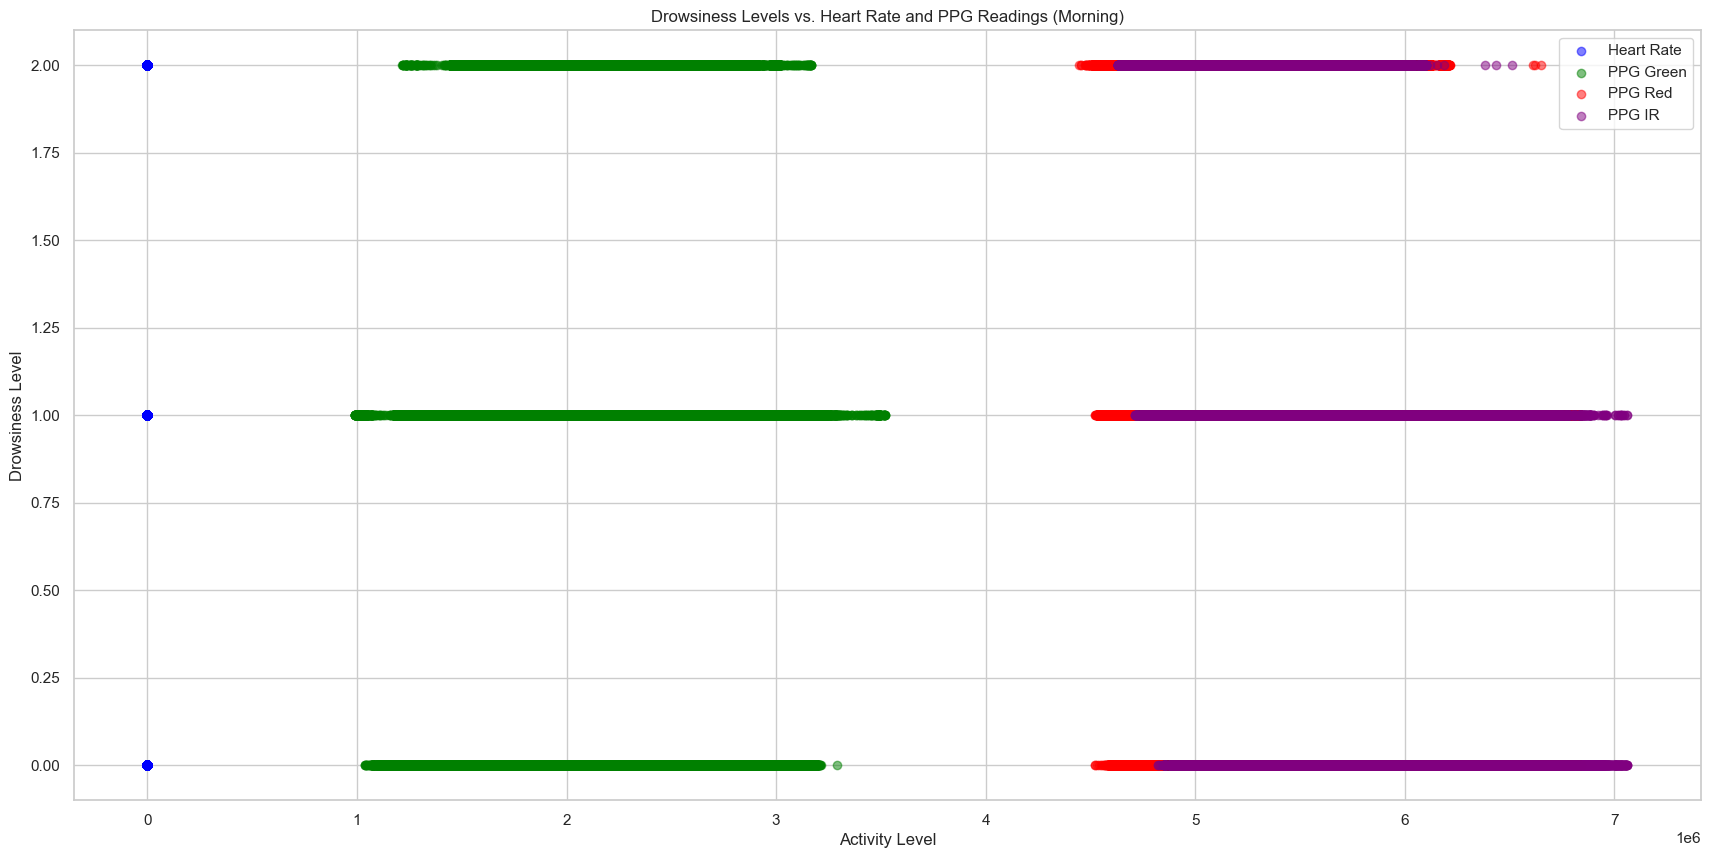

Correlation between drowsiness and heart rate (Afternoon): -0.6319114762754804
Correlation between drowsiness and PPG Green (Afternoon): -0.08278873014767286
Correlation between drowsiness and PPG Red (Afternoon): -0.6565096863047454
Correlation between drowsiness and PPG IR (Afternoon): -0.5784903897390709


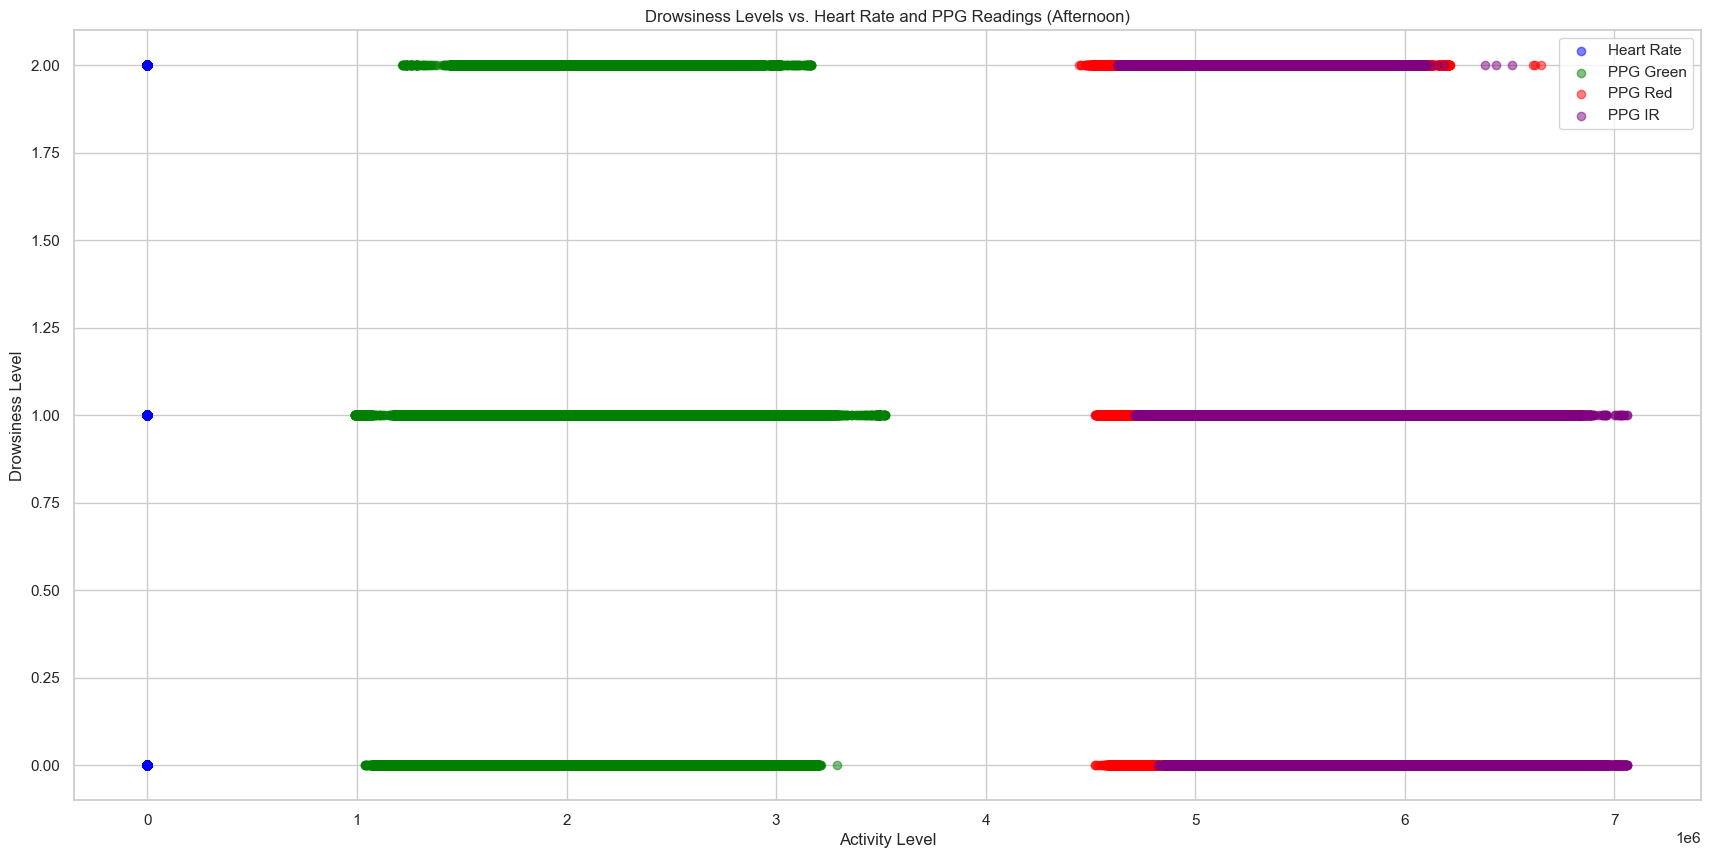

Correlation between drowsiness and heart rate (Evening): -0.6319114762754804
Correlation between drowsiness and PPG Green (Evening): -0.08278873014767286
Correlation between drowsiness and PPG Red (Evening): -0.6565096863047454
Correlation between drowsiness and PPG IR (Evening): -0.5784903897390709


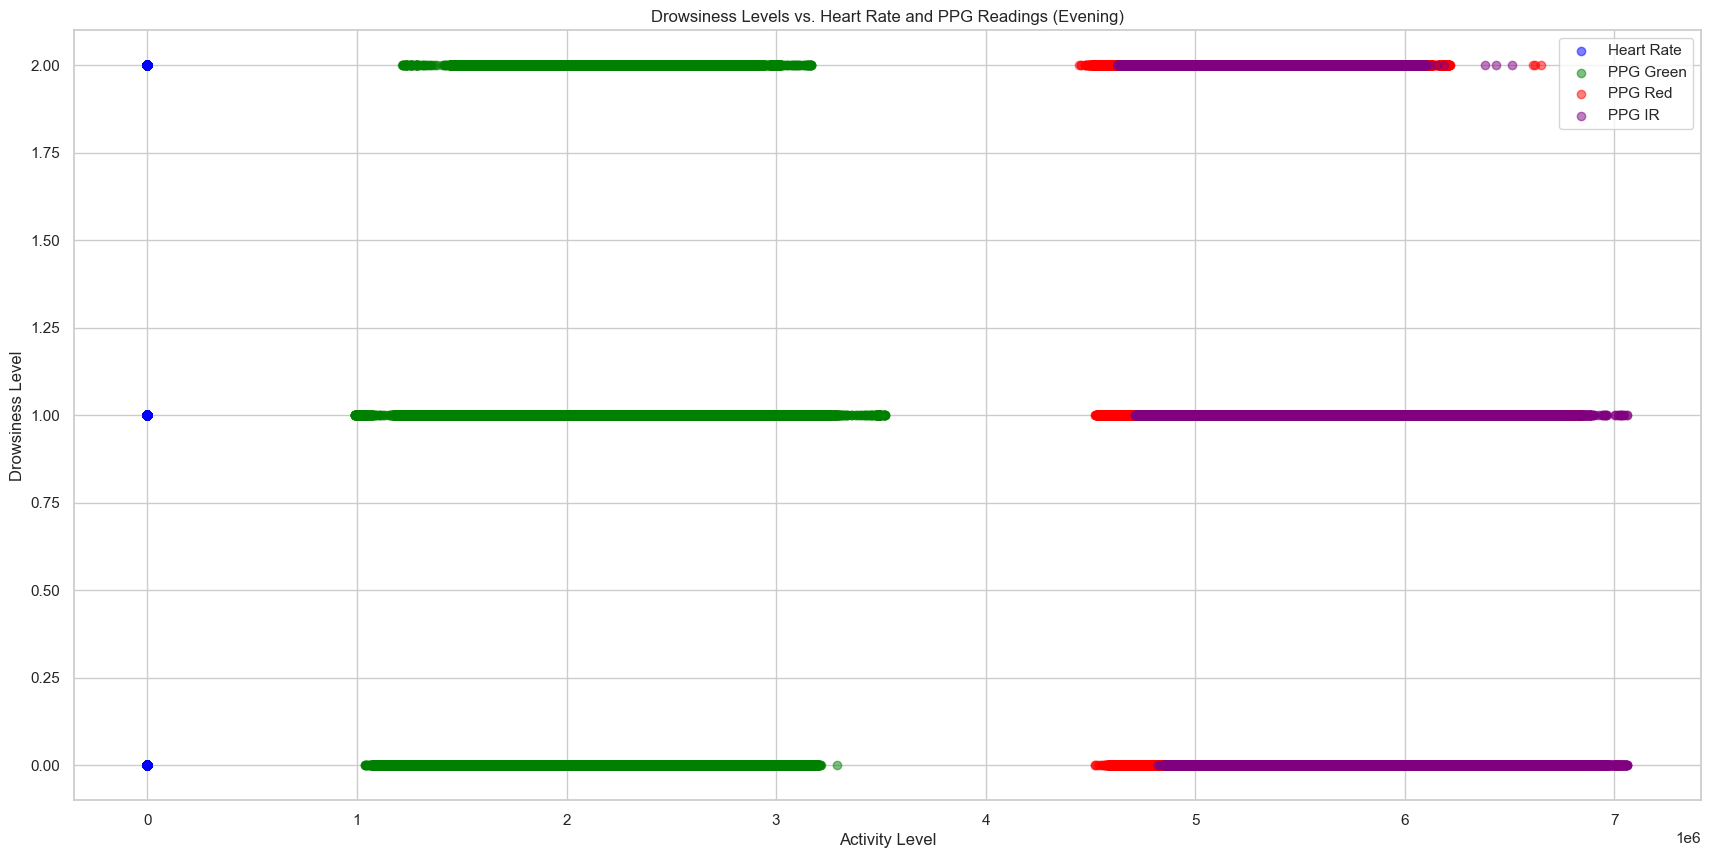

Correlation between drowsiness and heart rate (Night): -0.6319114762754804
Correlation between drowsiness and PPG Green (Night): -0.08278873014767286
Correlation between drowsiness and PPG Red (Night): -0.6565096863047454
Correlation between drowsiness and PPG IR (Night): -0.5784903897390709


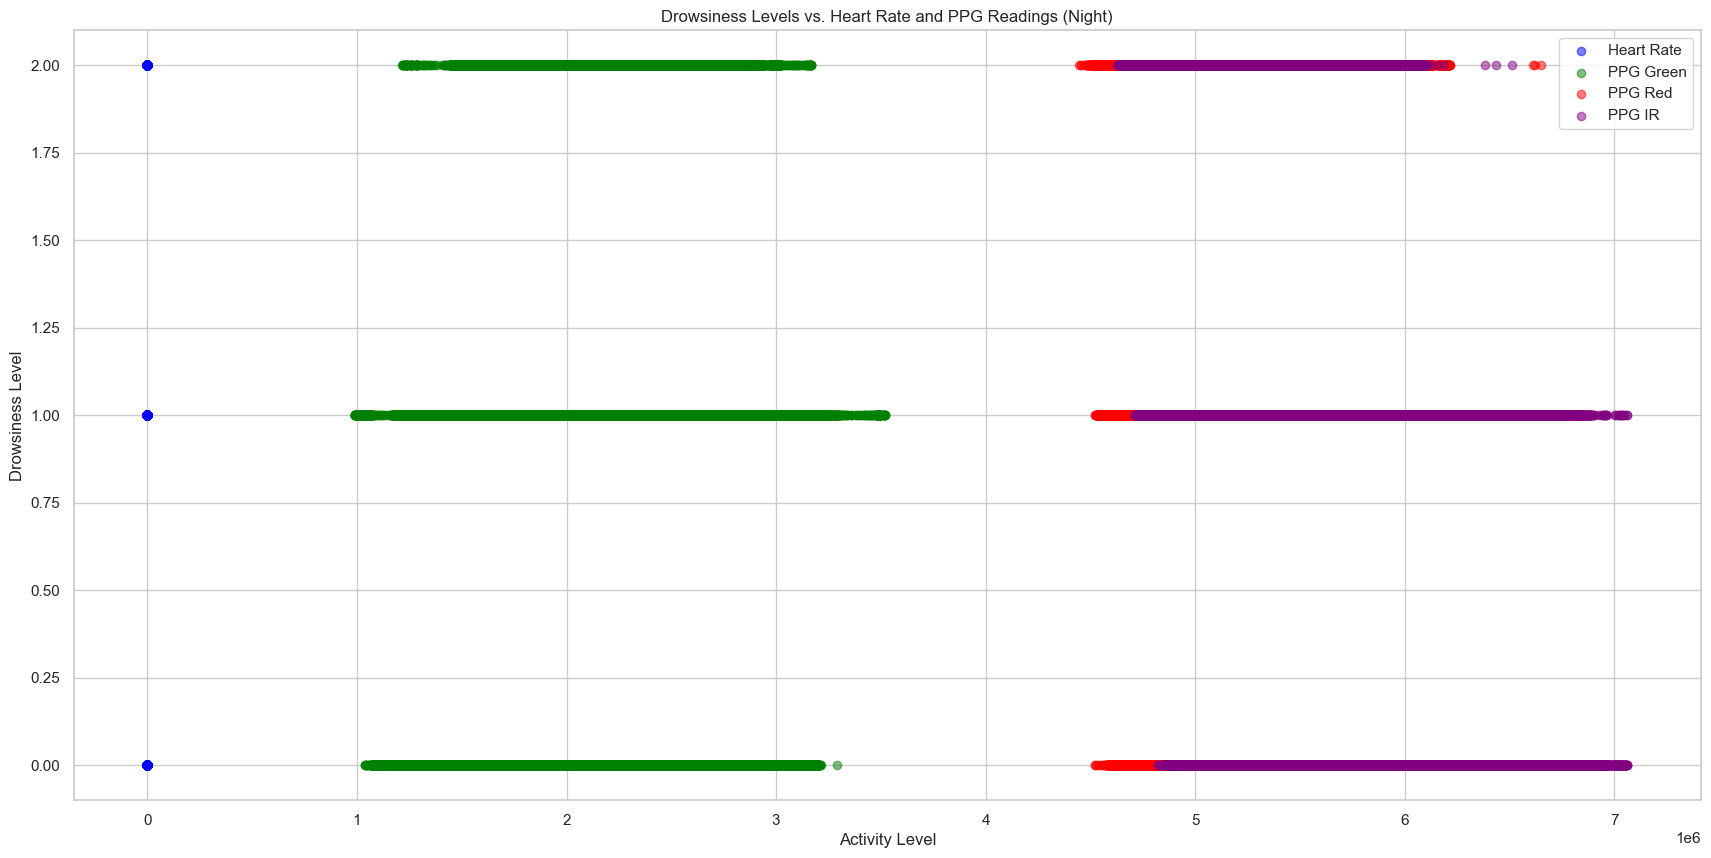

In [94]:
# Calculate and plot correlations for each period
plt.figure(figsize=(21, 10))
calculate_and_plot_correlations(morning_data, 'Morning')
plt.figure(figsize=(21, 10))
calculate_and_plot_correlations(morning_data, 'Afternoon')
plt.figure(figsize=(21, 10))
calculate_and_plot_correlations(morning_data, 'Evening')
plt.figure(figsize=(21, 10))
calculate_and_plot_correlations(morning_data, 'Night')

#period_labels = ['Morning','Afternoon','Evening','Night']

In [ ]:
# Visualization type 5
#df = ['heartRate', 'ppgGreen', 'ppgRed', 'ppgIR', 'drowsiness']
#plt.figure(figsize=(15, 10))
#hr100green = morning_data[morning_data['heartRate'] > 100]
#hr100cn = hr100green['drowsiness'].value_counts()
#sns.histplot(x='drowsiness', y='ppgIR', data=hr100green, hue='heartRate' , palette='Blues',stat="count")
#sns.histplot(x='ppgRed', y='drowsiness', data=hr100green, hue='heartRate' , palette='Blues',stat="count")
#sns.barplot(x='ppgGreen', y='drowsiness', data=hr100green, hue='heartRate' , palette='Reds')
#plt.scatter(x='ppgGreen',y='heartRate',data=hr100green,alpha=0.5)
#plt.hist(data=hr100green, bins=3, color='orange', edgecolor='black', x='drowsiness')



##values = [hr100green['ppgGreen'].count(),hr100green['ppgRed'].count(),hr100green['ppgIR'].count() ]
#print(values)
#categories = ['ppgGreen', 'ppgRed', 'ppgIR']
#print(categories)
#plt.bar(categories, values, color='skyblue',data=hr100green)


#hr100cn.plot(kind='bar', title='Frequency of Drowsiness', color=['#d73027', '#f46d43', '#f46d00'])
#plt.title('ppgRed Distribution by drowsiness')
#plt.show()

#'count', 'frequency', 'density', 'probability', 'proportion', 'percent'
#plt.figure(figsize=(15, 10))
#sns.scatterplot(x='ppgGreen', y='drowsiness', data=morning_data)
#plt.title('ppgGreen Distribution by drowsiness')
#plt.show()

drowsiness == 2 and heartRate <= 50 count: 1332


<Figure size 2850x1500 with 0 Axes>

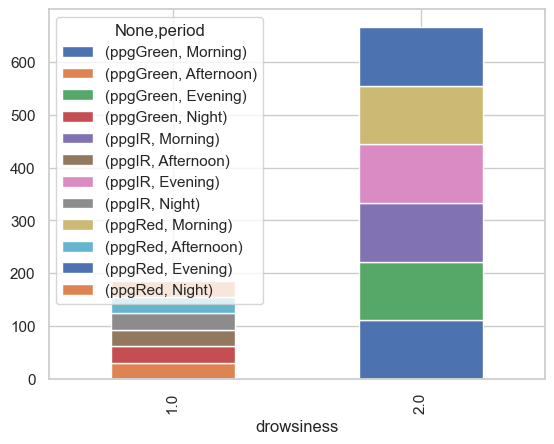

In [256]:
#Stacked Bar Chart: drowsiness, period, ppg rate
plt.figure(figsize=(28.5,15.0),clear=True)
data50 = data[data['heartRate'] <= 50]
pivot_data = data50.pivot_table(index='drowsiness',columns=['period'], values=['ppgGreen','ppgRed','ppgIR'], aggfunc='count', observed=False)
pivot_data.plot(kind='bar',stacked=True)
print(f'drowsiness == 2 and heartRate <= 50 count: {(data50[data50['drowsiness'] > 1.0].count().sum() )}')
plt.show()

<Figure size 2550x1000 with 0 Axes>

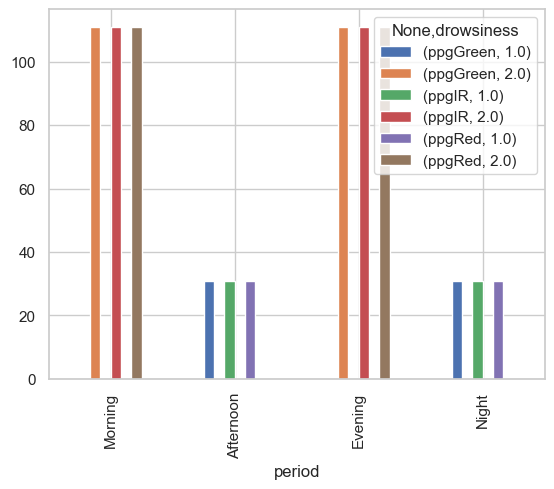

In [257]:
#Stacked Bar Chart: period, drowsiness, ppg rate
plt.figure(figsize=(25.5,10.0),clear=True)
pivot_data = data50.pivot_table(index='period',columns=['drowsiness'], values=['ppgGreen','ppgRed','ppgIR'], aggfunc='count', observed=False)
pivot_data.plot(kind='bar',stacked=False)
plt.show()

drowsiness == 2 and heartRate > 100 count: 14964


<Figure size 2850x1500 with 0 Axes>

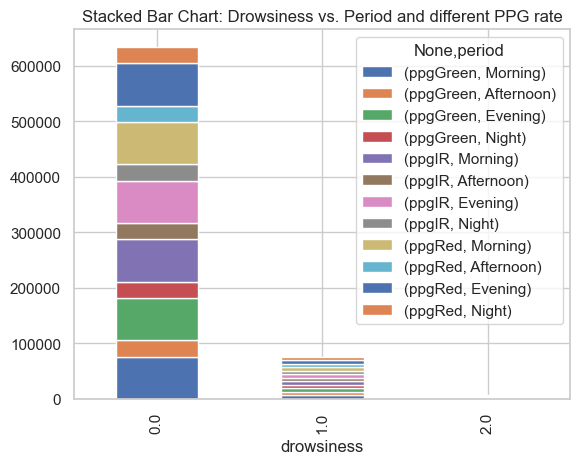

In [268]:
#Stacked Bar Chart: drowsiness, period, ppg rate
plt.figure(figsize=(28.5,15.0),clear=True)
data100 = data[data['heartRate'] > 100]
pivot_data = data100.pivot_table(index='drowsiness',columns=['period'], values=['ppgGreen','ppgRed','ppgIR'], aggfunc='count', observed=False)
pivot_data.plot(kind='bar',stacked=True)
print(f'drowsiness == 2 and heartRate > 100 count: {(data100[data100['drowsiness'] > 1.0].count().sum() )}')
plt.title("Stacked Bar Chart: Drowsiness vs. Period and different PPG rate")
plt.show()

<Figure size 2550x1000 with 0 Axes>

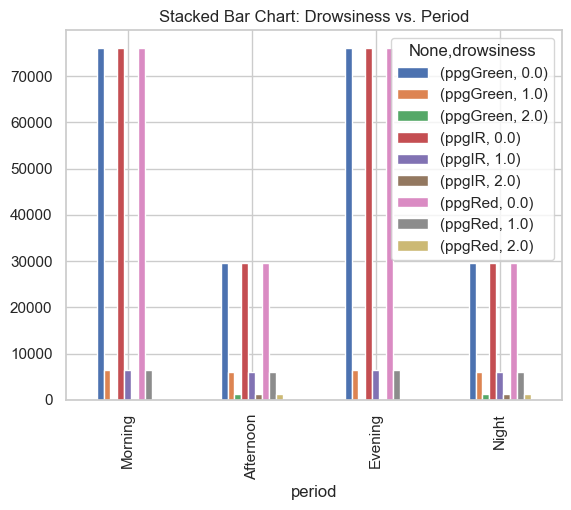

green: 3530798.0
Red (min): 4441989.0
Red: 6842637.0
IR (min): 4409976.0
IR: 7061799.0


In [269]:
#Stacked Bar Chart: period, drowsiness, ppg rate
plt.figure(figsize=(25.5,10.0),clear=True)
pivot_data = data100.pivot_table(index='period',columns=['drowsiness'], values=['ppgGreen','ppgRed','ppgIR'], aggfunc='count', observed=False)
pivot_data.plot(kind='bar',stacked=False)
plt.title("Stacked Bar Chart: Drowsiness vs. Period")
plt.show()

print(f'green: {max(data['ppgGreen'])}')
print(f'Red (min): {min(data['ppgRed'])}')
print(f'Red: {max(data['ppgRed'])}')
print(f'IR (min): {min(data['ppgIR'])}')
print(f'IR: {max(data['ppgIR'])}')







C:\Users\blccr\AppData\Local\Temp\ipykernel_22112\4240119502.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='drowsiness', data=data100, order=orders, palette='viridis')


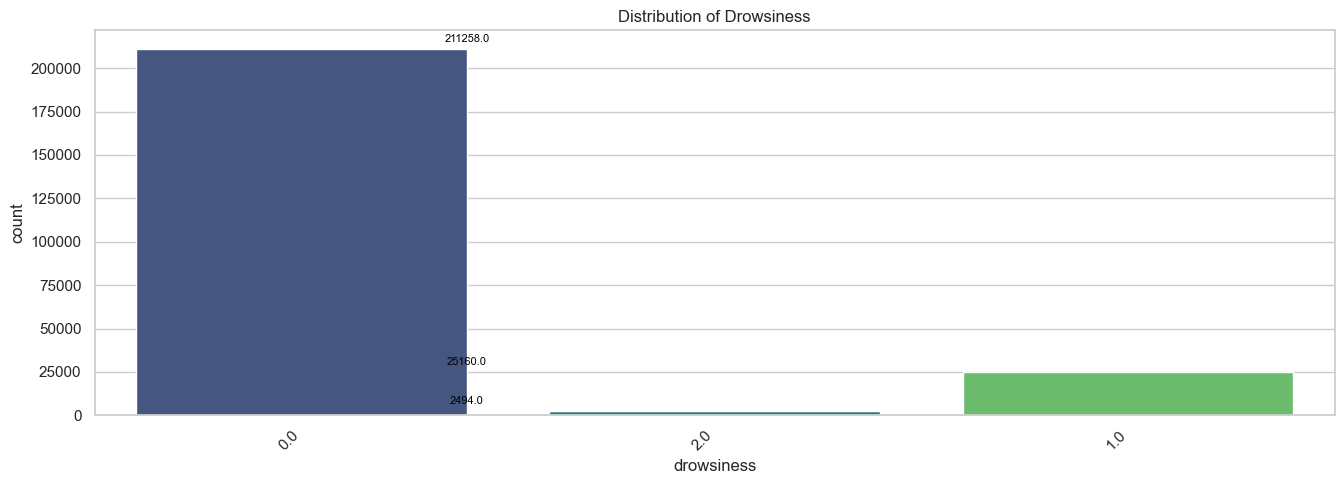

In [98]:
sns.set_style('whitegrid')
plt.figure(figsize=(16,5))
orders = data['drowsiness'].value_counts().index
sns.countplot(x='drowsiness', data=data100, order=orders, palette='viridis')
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_width()/2.,p.get_height()), ha='center', 
                        va='baseline', fontsize=8, color='black', xytext=(0,5), textcoords='offset points')

plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Drowsiness')
plt.show()

C:\Users\blccr\AppData\Local\Temp\ipykernel_22112\3598342508.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='drowsiness', data=data50, order=orders, palette='viridis')


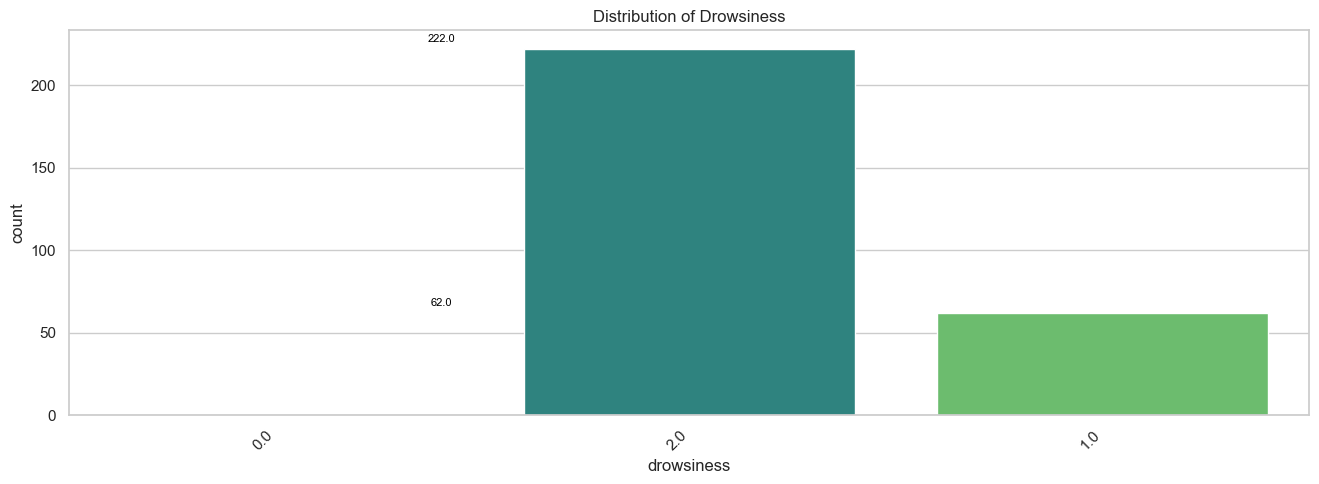

In [258]:
sns.set_style('whitegrid')
plt.figure(figsize=(16,5))
orders = data['drowsiness'].value_counts().index
sns.countplot(x='drowsiness', data=data50, order=orders, palette='viridis')
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_width()/2.,p.get_height()), ha='center', 
                        va='baseline', fontsize=8, color='black', xytext=(0,5), textcoords='offset points')

plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Drowsiness')
plt.show()

In [248]:
#Split the data
sleepy = data100[data100['drowsiness'] == 2.0]
awake = data100[data100['drowsiness'] != 2.0]

### T- Test
from scipy.stats import ttest_ind, chi2_contingency, f_oneway, norm

ttest_results = {
    col: ttest_ind(sleepy[col], awake[col], equal_var=False, nan_policy='omit')
    for col in valid_numeric_columns
}

for col, result in ttest_results.items():
  print(f'{col}: t-statistics = {result.statistic:.4f}, p_value = {result.pvalue:.4f}')

heartRate: t-statistics = -46.5266, p_value = 0.0000
ppgGreen: t-statistics = 8.3503, p_value = 0.0000
ppgRed: t-statistics = -8.7886, p_value = 0.0000
ppgIR: t-statistics = 20.6772, p_value = 0.0000
drowsiness: t-statistics = 2985.6663, p_value = 0.0000


f:\Anaconda\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


In [259]:
#Split the data
sleepy50 = data50[data50['drowsiness'] == 2.0]
awake50 = data50[data50['drowsiness'] != 2.0]

### T- Test
from scipy.stats import ttest_ind, chi2_contingency, f_oneway, norm

ttest_results = {
    col: ttest_ind(sleepy50[col], awake50[col], equal_var=False, nan_policy='omit')
    for col in valid_numeric_columns
}

for col, result in ttest_results.items():
  print(f'{col}: t-statistics = {result.statistic:.4f}, p_value = {result.pvalue:.4f}')

heartRate: t-statistics = nan, p_value = nan
ppgGreen: t-statistics = -356.0146, p_value = 0.0000
ppgRed: t-statistics = -362.2490, p_value = 0.0000
ppgIR: t-statistics = -489.5751, p_value = 0.0000
drowsiness: t-statistics = inf, p_value = 0.0000


f:\Anaconda\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


In [249]:
def chi2test(ppgtype):
    from scipy.stats import ttest_ind, chi2_contingency, f_oneway, norm

    table = pd.crosstab(sleepy[ppgtype], sleepy['period'] == 'Morning')
    chi2, chi_p, dof, expected = chi2_contingency(table)

    print(f'Chi-Square {chi2}, p-value {chi_p}, Degree of Freedom {dof}')

In [260]:
def chi2test50(ppgtype):
    from scipy.stats import ttest_ind, chi2_contingency, f_oneway, norm

    table = pd.crosstab(sleepy50[ppgtype], sleepy50['period'] == 'Morning')
    chi2, chi_p, dof, expected = chi2_contingency(table)

    print(f'Chi-Square {chi2}, p-value {chi_p}, Degree of Freedom {dof}')

In [238]:
def chi2testAw(ppgtype):
    from scipy.stats import ttest_ind, chi2_contingency, f_oneway, norm

    table2 = pd.crosstab(awake[ppgtype], awake['period'] == 'Morning')
    chi2, chi_p, dof, expected = chi2_contingency(table2)

    print(f'Chi-Square {chi2}, p-value {chi_p}, Degree of Freedom {dof}')

In [261]:
def chi2testAw50(ppgtype):
    from scipy.stats import ttest_ind, chi2_contingency, f_oneway, norm

    table2 = pd.crosstab(awake50[ppgtype], awake50['period'] == 'Morning')
    chi2, chi_p, dof, expected = chi2_contingency(table2)

    print(f'Chi-Square {chi2}, p-value {chi_p}, Degree of Freedom {dof}')

In [255]:
#Chi2 Test
#table = pd.crosstab(data100['ppgGreen'], data100['drowsiness'] == 2.0)
#chi2, chi_p, dof, expected = chi2_contingency(table)

#print(f'Chi-Square {chi2}, p-value {chi_p}, Degree of Freedom {dof}')

chi2test('ppgGreen')
chi2test('ppgRed')
chi2test('ppgIR')

Chi-Square 0.0, p-value 1.0, Degree of Freedom 0
Chi-Square 0.0, p-value 1.0, Degree of Freedom 0
Chi-Square 0.0, p-value 1.0, Degree of Freedom 0


In [262]:
chi2test50('ppgGreen')
chi2test50('ppgRed')
chi2test50('ppgIR')

Chi-Square 0.0, p-value 1.0, Degree of Freedom 110
Chi-Square 0.0, p-value 1.0, Degree of Freedom 109
Chi-Square 0.0, p-value 1.0, Degree of Freedom 109


In [254]:
chi2testAw('ppgGreen')
chi2testAw('ppgRed')
chi2testAw('ppgIR')

Chi-Square 52980.44927969627, p-value 1.0, Degree of Freedom 106355
Chi-Square 53499.76342659389, p-value 1.0, Degree of Freedom 111547
Chi-Square 52849.45187121152, p-value 1.0, Degree of Freedom 110860


In [263]:
chi2testAw50('ppgGreen')
chi2testAw50('ppgRed')
chi2testAw50('ppgIR')

Chi-Square 0.0, p-value 1.0, Degree of Freedom 0
Chi-Square 0.0, p-value 1.0, Degree of Freedom 0
Chi-Square 0.0, p-value 1.0, Degree of Freedom 0


In [272]:
from scipy.stats import ttest_ind, chi2_contingency, f_oneway, norm

tableSdf = ['heartRate', 'ppgGreen', 'ppgRed', 'ppgIR']

tableS = pd.DataFrame({
    'heartRate': sleepy['heartRate'],
    'ppgGreen': sleepy['ppgGreen'],
    'ppgRed': sleepy['ppgRed'],
    'ppgIR': sleepy['ppgIR']
})

#table.head()
print(" 1. CHI2 on data-subset where Drowsiness is 2.0 and hearRate is greater the 100")
chi2, chi_p, dof, expected = chi2_contingency(tableS)

for col in tableS.columns:
    #table = pd.crosstab(awake[col], awake['drowsiness'] != 2.0)

    print(f'col: {col}, Chi-Square {chi2}, p-value {chi_p}, Degree of Freedom {dof}')

 1. CHI2 on data-subset where Drowsiness is 2.0 and hearRate is greater the 100
col: heartRate, Chi-Square 414459831.36999047, p-value 0.0, Degree of Freedom 7479
col: ppgGreen, Chi-Square 414459831.36999047, p-value 0.0, Degree of Freedom 7479
col: ppgRed, Chi-Square 414459831.36999047, p-value 0.0, Degree of Freedom 7479
col: ppgIR, Chi-Square 414459831.36999047, p-value 0.0, Degree of Freedom 7479


In [ ]:
from scipy.stats import ttest_ind, chi2_contingency, f_oneway, norm

tableSdf = ['heartRate', 'ppgGreen', 'ppgRed', 'ppgIR']

tableS = pd.DataFrame({
    'heartRate': sleepy50['heartRate'],
    'ppgGreen': sleepy50['ppgGreen'],
    'ppgRed': sleepy50['ppgRed'],
    'ppgIR': sleepy50['ppgIR']
})

#table.head()

chi2, chi_p, dof, expected = chi2_contingency(tableS)

for col in tableS.columns:
    #table = pd.crosstab(awake[col], awake['drowsiness'] != 2.0)

    print(f'col: {col}, Chi-Square {chi2}, p-value {chi_p}, Degree of Freedom {dof}')

col: heartRate, Chi-Square 17096.950504679324, p-value 0.0, Degree of Freedom 663
col: ppgGreen, Chi-Square 17096.950504679324, p-value 0.0, Degree of Freedom 663
col: ppgRed, Chi-Square 17096.950504679324, p-value 0.0, Degree of Freedom 663
col: ppgIR, Chi-Square 17096.950504679324, p-value 0.0, Degree of Freedom 663


In [273]:
from scipy.stats import ttest_ind, chi2_contingency, f_oneway, norm

tabledf = ['heartRate', 'ppgGreen', 'ppgRed', 'ppgIR']

tabled = pd.DataFrame({
    'heartRate': awake['heartRate'],
    'ppgGreen': awake['ppgGreen'],
    'ppgRed': awake['ppgRed'],
    'ppgIR': awake['ppgIR']
})

#table.head()
print(" 2. CHI2 on data-subset where Drowsiness is not equal to 2.0 and hearRate is greater the 100")
chi2, chi_p, dof, expected = chi2_contingency(tabled)

for col in tabled.columns:
    #table = pd.crosstab(awake[col], awake['drowsiness'] != 2.0)

    print(f'col: {col}, Chi-Square {chi2}, p-value {chi_p}, Degree of Freedom {dof}')

 2. CHI2 on data-subset where Drowsiness is not equal to 2.0 and hearRate is greater the 100
col: heartRate, Chi-Square 18441147772.438717, p-value 0.0, Degree of Freedom 709251
col: ppgGreen, Chi-Square 18441147772.438717, p-value 0.0, Degree of Freedom 709251
col: ppgRed, Chi-Square 18441147772.438717, p-value 0.0, Degree of Freedom 709251
col: ppgIR, Chi-Square 18441147772.438717, p-value 0.0, Degree of Freedom 709251


In [266]:
from scipy.stats import ttest_ind, chi2_contingency, f_oneway, norm

tabledf = ['heartRate', 'ppgGreen', 'ppgRed', 'ppgIR']

tabled = pd.DataFrame({
    'heartRate': awake50['heartRate'],
    'ppgGreen': awake50['ppgGreen'],
    'ppgRed': awake50['ppgRed'],
    'ppgIR': awake50['ppgIR']
})

#table.head()

chi2, chi_p, dof, expected = chi2_contingency(tabled)

for col in tabled.columns:
    #table = pd.crosstab(awake[col], awake['drowsiness'] != 2.0)

    print(f'col: {col}, Chi-Square {chi2}, p-value {chi_p}, Degree of Freedom {dof}')

col: heartRate, Chi-Square 5218.825744061101, p-value 0.0, Degree of Freedom 183
col: ppgGreen, Chi-Square 5218.825744061101, p-value 0.0, Degree of Freedom 183
col: ppgRed, Chi-Square 5218.825744061101, p-value 0.0, Degree of Freedom 183
col: ppgIR, Chi-Square 5218.825744061101, p-value 0.0, Degree of Freedom 183


In [105]:
data100.columns

Index(['heartRate', 'ppgGreen', 'ppgRed', 'ppgIR', 'drowsiness', 'period'], dtype='object')

In [243]:


df100 = ['heartRate', 'ppgGreen', 'ppgRed', 'ppgIR', 'drowsiness']

ds100 = pd.DataFrame({
    'Mean': sleepy[df100].mean(),
    'Median': sleepy[df100].median(),
    'Mode': sleepy[df100].mode().iloc[0],
    'Variance': sleepy[df100].var(),
    'Standard Deviation': sleepy[df100].std(),
    'Skewness': sleepy[df100].skew(),
    'Kurtosis': sleepy[df100].kurt()
})

ds100.head()




,Mean,Median,Mode,Variance,Standard Deviation,Skewness,Kurtosis
heartRate,1.043777e+02,104.0,104.0,6.669154e+00,2.582470,0.589157,-0.635136
ppgGreen,2.131692e+06,2216770.0,1526837.0,4.064354e+11,637522.869109,-0.699593,-0.542053
ppgRed,5.697512e+06,5700182.0,4572223.0,1.143950e+11,338223.369799,-0.919855,1.446308
ppgIR,6.020859e+06,5991034.0,5253299.0,8.584050e+10,292985.500650,-0.088828,2.039291
drowsiness,2.000000e+00,2.0,2.0,0.000000e+00,0.000000,0.000000,0.000000


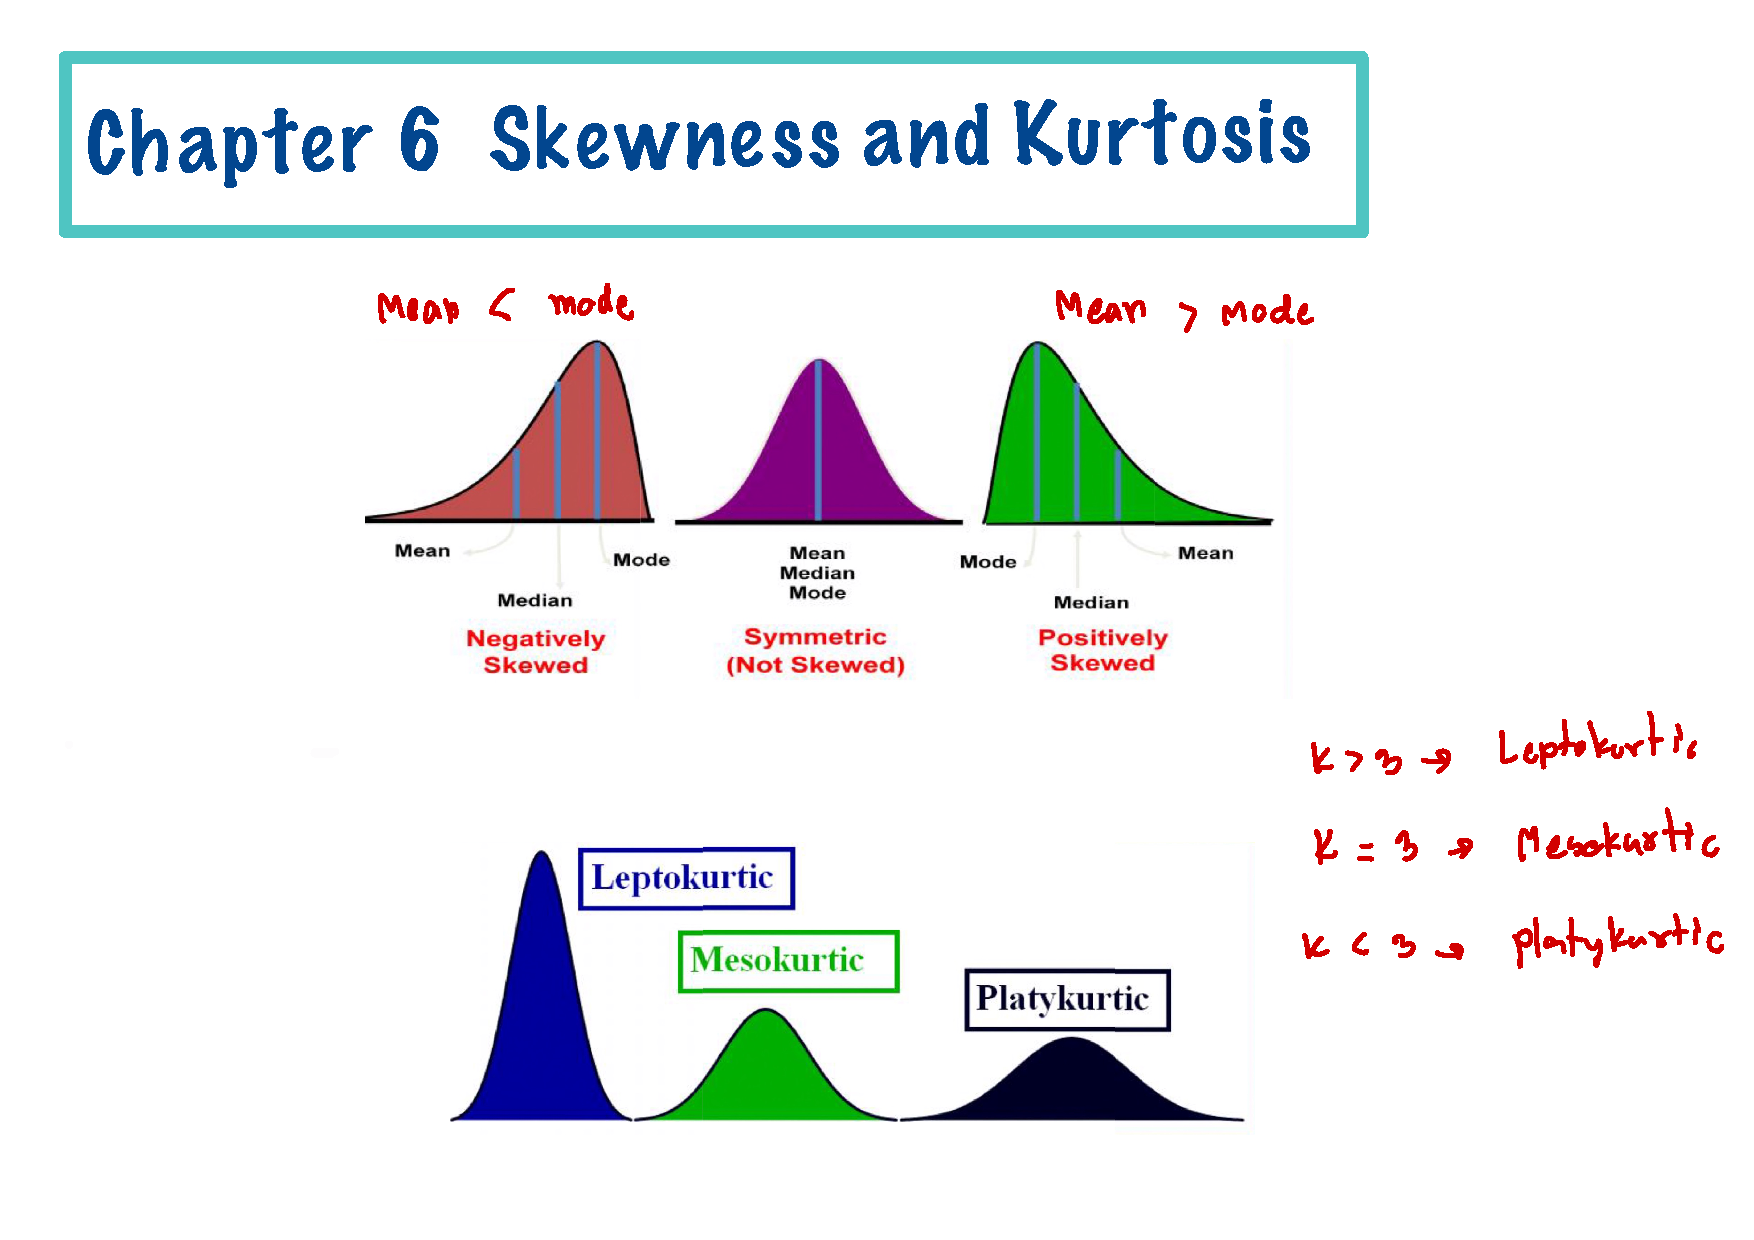

In [141]:
#Confidence Interval
ci= {}
cl = 0.999
z_score = norm.ppf((1+cl)/ 2)

for col in valid_numeric_columns:
  mean = sleepy[col].mean()
  se = sleepy[col].std() / np.sqrt(len(sleepy[col]))
  me = z_score * se
  lb = mean - me
  up = mean + me
  ci[col] = (lb, up)
  print(f'{col}: Mean: {mean}, 99% CI Value: ({lb}, {up})')




heartRate: Mean: 104.37770649558941, 99% CI Value: (104.20754841973364, 104.54786457144517)
ppgGreen: Mean: 2131692.1291098637, 99% CI Value: (2089685.9705840389, 2173698.2876356887)
ppgRed: Mean: 5697512.468323978, 99% CI Value: (5675227.048965207, 5719797.887682748)
ppgIR: Mean: 6020858.623897353, 99% CI Value: (6001553.9118902935, 6040163.335904413)
drowsiness: Mean: 2.0, 99% CI Value: (2.0, 2.0)


In [143]:
#Confidence Interval Awake
ci= {}
cl = 0.95
z_score = norm.ppf((1+cl)/ 2)

for col in valid_numeric_columns:
  mean = awake[col].mean()
  se = awake[col].std() / np.sqrt(len(awake[col]))
  me = z_score * se
  lb = mean - me
  up = mean + me
  ci[col] = (lb, up)
  print(f'{col}: Mean: {mean}, 95% CI Value: ({lb}, {up})')

heartRate: Mean: 106.83397203258635, 95% CI Value: (106.81313855748502, 106.85480550768767)
ppgGreen: Mean: 2024811.580928694, 95% CI Value: (2022990.9022293543, 2026632.2596280337)
ppgRed: Mean: 5757510.558510773, 95% CI Value: (5755827.162043937, 5759193.954977609)
ppgIR: Mean: 5898363.407743911, 95% CI Value: (5896750.827946104, 5899975.987541718)
drowsiness: Mean: 0.10642167686047593, 95% CI Value: (0.10517862255741596, 0.1076647311635359)
